<a href="https://colab.research.google.com/github/Mytros/DS_ML_homework/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_Dmytro_Koval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
medical_df = pd.read_csv('drive/MyDrive/DS_ML/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
X = non_smoker_df["age"].values
y = non_smoker_df["charges"].values
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [ ]:
X_with_intercept

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [ ]:
# 1.1 OLS
theta_ols = np.dot(np.dot(np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept)),
                          X_with_intercept.T), y)
y_pred_ols = np.dot(X_with_intercept, theta_ols)
rmse_ols = np.sqrt(np.mean((y - y_pred_ols) ** 2))

print("theta_ols:", theta_ols,"\nrmse_ols:", rmse_ols)



theta_ols: [-2091.42055657   267.24891283] 
rmse_ols: 4662.505766636395


In [ ]:
X = np.c_[non_smoker_df["age"].values]

In [ ]:
# 2.1 Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=10)
predictions_fbgd = m * X[:, 0] + b

m, b

(np.float64(217.09829455062746), np.float64(4.413216911503921))

In [ ]:
learning_rates = [0.0001, 0.001, 0.01]
results = {}

for lr in learning_rates:
    m, b, errors = full_batch_gradient_descent(X, y, lr=lr, epochs=500)
    predictions = m * X[:, 0] + b
    rmse = np.sqrt(np.mean((y - predictions) ** 2))
    results[lr] = {"m": m, "b": b, "errors": errors, "rmse": rmse, "predictions": predictions}

# Повертаємо висновки
{lr: {"m": res["m"], "b": res["b"], "rmse": res["rmse"]} for lr, res in results.items()}

<ipython-input-248-2715146686>:9: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))
<ipython-input-248-2715146686>:9: RuntimeWarning: overflow encountered in square
  errors.append(sum(error**2))
<ipython-input-249-1582761297>:7: RuntimeWarning: overflow encountered in square
  rmse = np.sqrt(np.mean((y - predictions) ** 2))
<ipython-input-248-2715146686>:12: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - lr * m_gradient


{0.0001: {'m': np.float64(220.57918226137932),
  'b': np.float64(-18.646228692860056),
  'rmse': np.float64(4714.406330819462)},
 0.001: {'m': np.float64(-2.267485986146637e+201),
  'b': np.float64(-5.105377783839002e+199),
  'rmse': np.float64(inf)},
 0.01: {'m': np.float64(nan), 'b': np.float64(nan), 'rmse': np.float64(nan)}}

Висновок:

learning rate = 0.0001;	m = 220.58, b = -18.65	4714.41.

Інші значення learning rate занадто великі.

In [ ]:
X = np.c_[non_smoker_df["age"].values]
y = non_smoker_df["charges"].values

In [ ]:
# 3.1
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [ ]:
predictions_sklearn = lin_reg.predict(X)

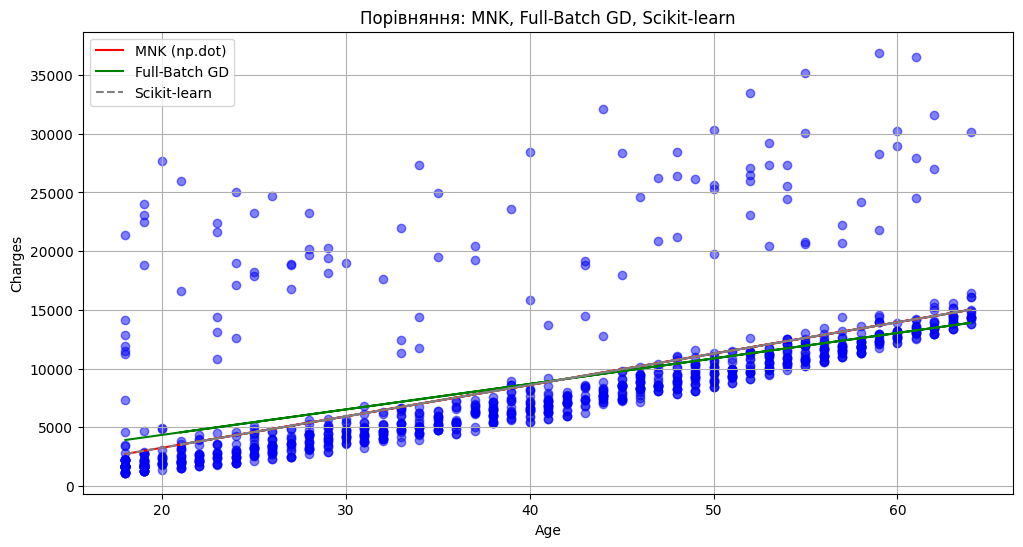

In [ ]:


plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', alpha=0.5)

# MNK
plt.plot(X, y_pred_ols, color='red', label='MNK (np.dot)')

# Full-Batch GD
plt.plot(X, predictions_fbgd, color='green', label='Full-Batch GD')

# Scikit-learn
plt.plot(X, predictions_sklearn, color='grey', linestyle='--', label='Scikit-learn')

plt.title('Порівняння: MNK, Full-Batch GD, Scikit-learn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print('Коефіцієнти з МНК: ', theta_ols)
print('Коефіцієнти з стохаст. град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з стохаст. град. спуску:  nan nan
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


In [ ]:
print('RMSE МНК: ', rmse_ols)

# Full-Batch GD
rmse_sgd = results[0.0001]["rmse"]
print("RMSE град. спуску:", rmse_sgd)

# Scikit-learn
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))
print("RMSE sklearn:", rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску: 4714.406330819462
RMSE sklearn: 4662.505766636395


Висновок:

 - Scikit-learn та МНК дали ідентичні результати, бо sklearn використовує МНК під капотом.

- Full-Batch GD досягає дуже близьких результатів за умови малого learning rate (0.0001).


 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

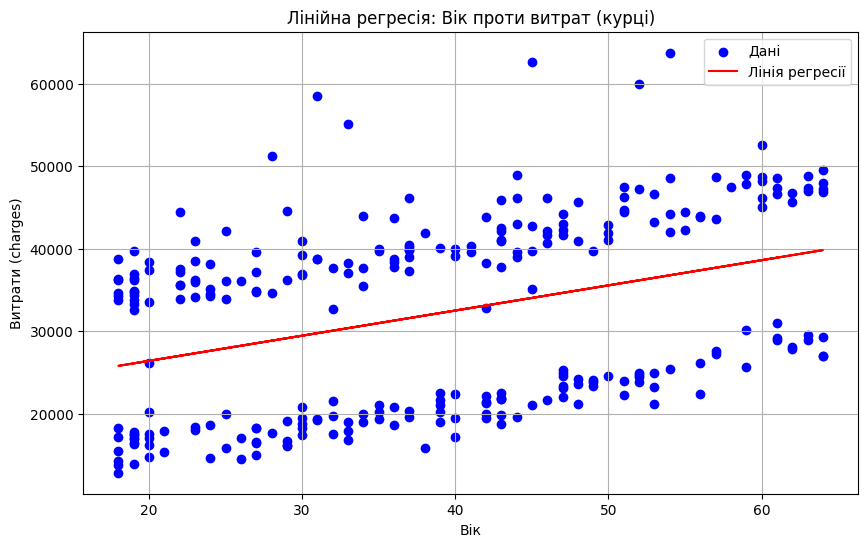

R squared (коефіцієнт детермінації): 0.136
RMSE (середньоквадратична помилка): 10711.00
m (нахил прямої): 305.24
a (вільний член): 20294.13


In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']

X_smoker = smoker_df["age"].to_frame()
y_smoker = smoker_df["charges"].values

# Linear Regression
model_smoker = LinearRegression()
model_smoker.fit(X_smoker, y_smoker)

# Prediction
y_pred_smoker = model_smoker.predict(X_smoker)

# R² та RMSE
r2 = r2_score(y_smoker, y_pred_smoker)
rmse = np.sqrt(mean_squared_error(y_smoker, y_pred_smoker))

# m and a
m = model_smoker.coef_[0]
a = model_smoker.intercept_

# plot
plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, color='blue', label='Дані')
plt.plot(X_smoker, y_pred_smoker, color='red', label='Лінія регресії')
plt.title('Лінійна регресія: Вік проти витрат (курці)')
plt.xlabel('Вік')
plt.ylabel('Витрати (charges)')
plt.grid(True)
plt.legend()
plt.show()

print(f"R squared (коефіцієнт детермінації): {r2:.3f}")
print(f"RMSE (середньоквадратична помилка): {rmse:.2f}")
print(f"m (нахил прямої): {m:.2f}")
print(f"a (вільний член): {a:.2f}")

Висновок:
Рівняння лінійної регресії:

charges=m⋅age+a

тобто:

charges=305.24*age+20294.13


Так як коефіцієнт детермінації має мале значення, а середньоквадратична помилка завелика - то не слід сприймати цю модель і використовувати десь на проді.
